### Getting ROC coordinate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_ROC_coord(x, y):
    """
    Compute a coordinate of ROC curve based on a given classifier's output.

    Parameters
    ----------
    y: numpy.ndarray
        The true labels of the data.
    x: numpy.ndarray
        The predicted labels of the data.
    
    Returns
    -------
    FPR, TPR: float
        The false positive rate and true positive rate of the classifier. (Coordinates of ROC curve)
    """
    TP = np.sum((x == 1) & (y == 1))
    FP = np.sum((x == 1) & (y == 0))
    TN = np.sum((x == 0) & (y == 0))
    FN = np.sum((x == 0) & (y == 1))


    # Compute the false positive rate and true positive rate
    FPR = FP / (FP+TN)
    TPR = TP / (TP+FN)

    return round(FPR, 3), round(TPR, 3)


## Recreating ROC curve

In [33]:
def calc_AUC(labels, x_coords):
    """
    Compute the area under the ROC curve.

    Parameters
    ----------
    labels: numpy.ndarray
        The true labels of the data.
    x_coords: numpy.ndarray
        Continuous data associated with true labels.

    Returns
    -------
    float
        The area under the ROC curve.
    """
    ROC = np.empty((len(x_coords), 2))
    thresholds = np.linspace(min(x_coords), max(x_coords)+0.2*max(x_coords), len(x_coords))

    for i, threshold in enumerate(thresholds):
        x = np.array([1 if i > threshold else 0 for i in x_coords])
        ROC_x, ROC_y = get_ROC_coord(x, labels)
        ROC[i, 0] = ROC_x
        ROC[i, 1] = ROC_y

    # Compute the area under the ROC curve
    AUC = 0
    for i in range(1, len(ROC)):
        AUC += (ROC[i, 0] - ROC[i-1, 0]) * (ROC[i, 1] + ROC[i-1, 1]) / 2

    return 1+round(AUC, 3)

def regen_ROC(labels, x_coords, n=50):
    """
    Recreates ROC curve based on data points.

    Parameters
    ----------
    labels: numpy.ndarray
        The true labels of the data.
    x_coords: numpy.ndarray
        Continuous data associated with true labels.

    Returns
    -------
    Graph
        ROC curve.
    """

    ROC = np.empty((n, 2))
    vlines = []
    thresholds = np.linspace(min(x_coords), max(x_coords)+0.2*max(x_coords), n)

    for i, threshold in enumerate(thresholds):
        x = np.array([1 if i > threshold else 0 for i in x_coords])
        ROC_x, ROC_y = get_ROC_coord(x, labels)
        if (ROC_y >= 1-1e-3 and ROC_y <= 1+1e-3): 
            vlines.append(ROC_x)
        ROC[i, 0] = ROC_x
        ROC[i, 1] = ROC_y

    
    # plotting

    plt.plot(ROC[:,0], ROC[:,1])
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.axvline(x=vlines[-1], color='r', linestyle='--')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('TPR')
    plt.grid()
    plt.tight_layout()
    plt.show()


### Questions

#### Textbook 

16.1

Coordinate on ROC curve:
(0.273, 1.0)


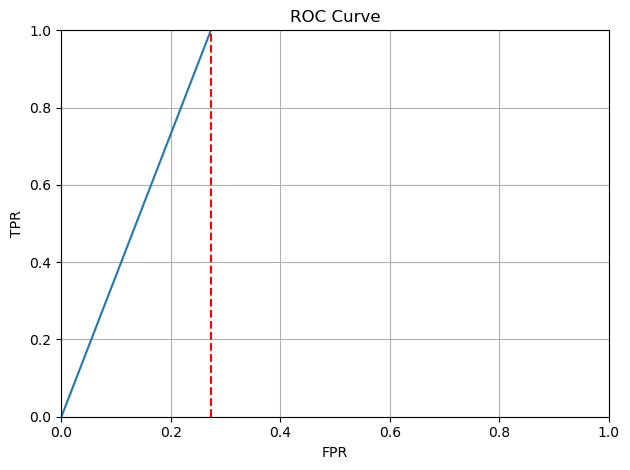

AUC: 0.864


In [34]:
x = np.array([1,0,1,0,1,0,1,0,1,0,0,1,0,0])
y = np.array([1,0,0,0,1,0,0,0,1,0,0,0,0,0]) 

print(f"Coordinate on ROC curve:\n{get_ROC_coord(x, y)}")
regen_ROC(y, x)

print(f"AUC: {calc_AUC(y, x)}")


16.2

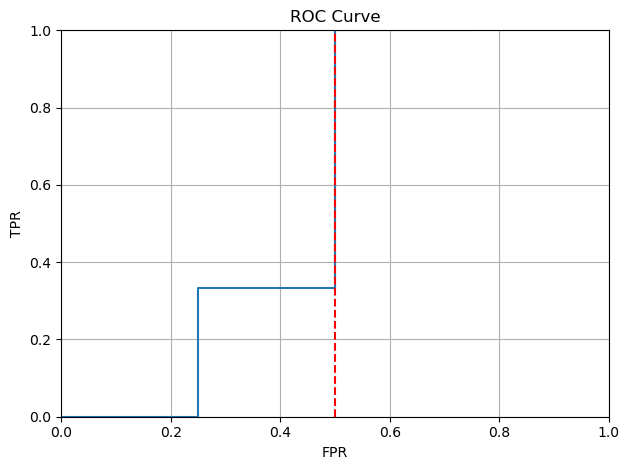

AUC: 0.583


In [36]:
x = np.array([-0.6, -0.1, 0.3, 0.55,0.6, 0.7, 0.75])
y = np.array([0,0,1,1,0,1,0])

regen_ROC(y, x, n=100)

print(f"AUC: {calc_AUC(y, x)}")
